In [62]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize



In [63]:
mf_data = pd.read_csv('mutual_funds.csv' , index_col='Date')

In [72]:
mf_data.index = pd.to_datetime(mf_data.index)

In [65]:
mf_data.describe

<bound method NDFrame.describe of                  VSPVX      WSHFX      TMSIX      VSCAX      BRXAX      TSORX  \
Date                                                                            
2018-01-01  218.451309  34.420761  21.532011  11.505996  10.421366  10.485023   
2018-08-01  222.193939  34.968170  21.970984  11.831527  10.529059  10.612334   
2018-01-15  223.109604  35.249279  21.941219  11.825608  10.603615  10.721458   
2018-01-22  227.510071  35.952049  22.194191  12.015005  10.876990  10.885145   
2018-01-29  218.433517  34.657478  21.465046  11.529670  10.487638  10.494117   
...                ...        ...        ...        ...        ...        ...   
2022-11-28  319.259491  53.588699  32.303288  18.011023  11.287829  11.460265   
2022-05-12  309.854034  52.267578  31.057859  16.959547  11.200024  11.068127   
2022-12-12  305.047028  50.437576  29.880539  15.418595  10.682950  11.100000   
2022-12-19  304.341827  51.709999  30.543762  17.360001  11.040000  11.1700

In [66]:
mf_data.head()

,VSPVX,WSHFX,TMSIX,VSCAX,BRXAX,TSORX,JGIAX,ACEIX,VWENX,SWPPX,...,BBBIX,VSEQX,SCOAX,THICX,CEYIX,LTXCX,WMGYX,PIREX,AIDAX,IYGIX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,218.451309,34.420761,21.532011,11.505996,10.421366,10.485023,7.539924,7.699511,50.211433,38.507683,...,9.016543,22.023918,8.541504,11.956155,42.262836,14.870366,15.739120,19.489298,12.959075,14.376349
2018-08-01,222.193939,34.968170,21.970984,11.831527,10.529059,10.612334,7.524080,7.816904,50.805527,39.127159,...,9.025397,22.423429,8.524837,11.947198,42.978592,14.851376,16.071142,19.002909,12.931943,14.679648
2018-01-15,223.109604,35.249279,21.941219,11.825608,10.603615,10.721458,7.500327,7.830713,50.948944,39.473339,...,9.025397,22.639040,8.483172,11.920333,43.519573,14.851376,16.249924,19.019678,12.922901,14.922287
2018-01-22,227.510071,35.952049,22.194191,12.015005,10.876990,10.885145,7.516161,7.975726,51.713753,40.347885,...,9.034257,22.956114,8.483172,11.920333,44.426746,14.832379,16.562790,19.321577,12.919267,15.183124
2018-01-29,218.433517,34.657478,21.465046,11.529670,10.487638,10.494117,7.476564,7.761659,50.184105,38.808308,...,9.016543,22.004894,8.408173,11.884509,43.203304,14.765910,15.917901,18.835178,12.828737,14.673583


<AxesSubplot:title={'center':'annual weekly returns'}, xlabel='Date'>

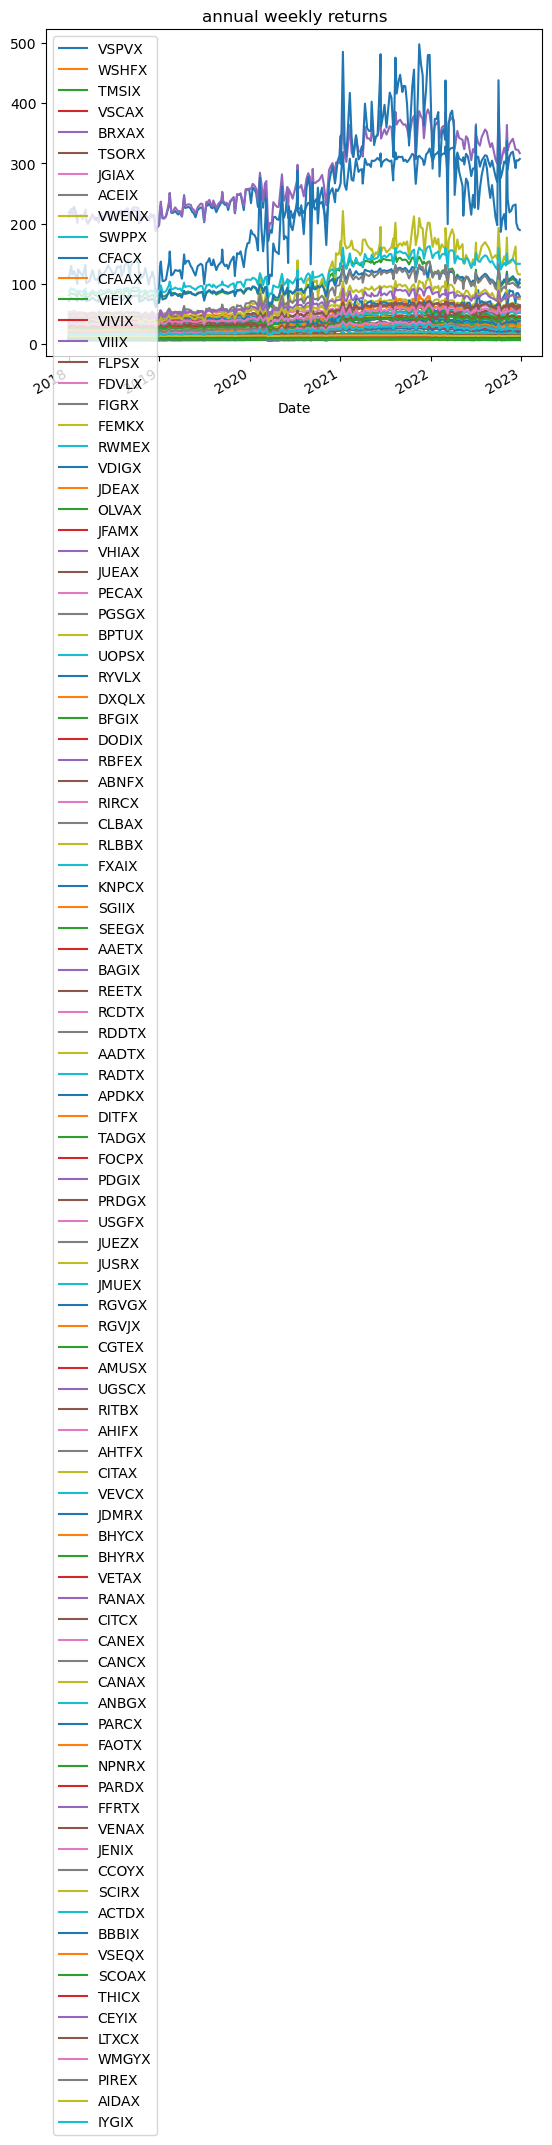

In [67]:
mf_data.plot(title = 'annual weekly returns')

In [68]:
Ret_mf = mf_data.pct_change()
Ret_mf.apply(lambda x: np.log(1+x))
Ret_mf

,VSPVX,WSHFX,TMSIX,VSCAX,BRXAX,TSORX,JGIAX,ACEIX,VWENX,SWPPX,...,BBBIX,VSEQX,SCOAX,THICX,CEYIX,LTXCX,WMGYX,PIREX,AIDAX,IYGIX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,0.017133,0.015903,0.020387,0.028292,0.010334,0.012142,-0.002101,0.015247,0.011832,0.016087,...,0.000982,0.018140,-0.001951,-0.000749,0.016936,-0.001277,0.021095,-0.024957,-0.002094,0.021097
2018-01-15,0.004121,0.008039,-0.001355,-0.000500,0.007081,0.010283,-0.003157,0.001767,0.002823,0.008848,...,0.000000,0.009615,-0.004887,-0.002249,0.012587,0.000000,0.011124,0.000882,-0.000699,0.016529
2018-01-22,0.019723,0.019937,0.011530,0.016016,0.025781,0.015267,0.002111,0.018518,0.015011,0.022155,...,0.000982,0.014006,0.000000,0.000000,0.020845,-0.001279,0.019253,0.015873,-0.000281,0.017480
2018-01-29,-0.039895,-0.036008,-0.032853,-0.040394,-0.035796,-0.035923,-0.005268,-0.026840,-0.029579,-0.038158,...,-0.001961,-0.041436,-0.008841,-0.003005,-0.027538,-0.004481,-0.038936,-0.025174,-0.007007,-0.033560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,0.006639,0.008843,0.008199,0.017930,0.017590,0.015638,0.009662,0.006579,0.014278,0.011998,...,0.003021,0.010373,0.014756,0.008857,0.013931,0.006685,-0.066090,0.010542,0.006618,-0.083068
2022-05-12,-0.029460,-0.024653,-0.038554,-0.058380,-0.007779,-0.034217,0.000651,-0.024276,-0.019817,-0.049004,...,0.002724,-0.038568,-0.001514,-0.001179,-0.026886,0.001996,0.056394,-0.019374,0.002191,0.073351
2022-12-12,-0.015514,-0.035012,-0.037907,-0.090860,-0.046167,0.002880,0.003601,-0.062201,-0.009202,-0.004591,...,0.002008,-0.118038,0.008989,0.004804,-0.047833,0.001989,-0.015099,-0.023556,0.000729,-0.020742


In [69]:
annual_return = Ret_mf.mean()*52
annual_var = Ret_mf.var()*52
annual_std    = annual_var**0.5

In [70]:
risk_free_rate = 0.005

In [71]:
sharpe_ratio = (annual_return - risk_free_rate) / annual_std
print(sharpe_ratio)
pd. set_option('display.max_row', 200)

VSPVX    0.407722
WSHFX    0.472024
TMSIX    0.376133
VSCAX    0.394800
BRXAX    0.132092
TSORX    0.136664
JGIAX    0.215256
ACEIX    0.323999
VWENX    0.310651
SWPPX    0.485723
CFACX   -0.096761
CFAAX    0.045838
VIEIX    0.281730
VIVIX    0.461872
VIIIX    0.476000
FLPSX    0.389005
FDVLX    0.374081
FIGRX    0.122501
FEMKX    0.106132
RWMEX    0.472862
VDIGX    0.583439
JDEAX    0.454388
OLVAX    0.377062
JFAMX    0.035774
VHIAX    0.487611
JUEAX    0.470401
PECAX    0.254059
PGSGX    0.302019
BPTUX    0.683000
UOPSX    0.436259
RYVLX    0.460117
DXQLX    0.526590
BFGIX    0.743214
DODIX    0.140093
RBFEX    0.056419
ABNFX    0.104689
RIRCX    0.261533
CLBAX    0.392748
RLBBX    0.344293
FXAIX    0.491534
KNPCX    0.631452
SGIIX    0.309396
SEEGX    0.557038
AAETX    0.335694
BAGIX   -0.023226
REETX    0.353605
RCDTX    0.317401
RDDTX    0.339328
AADTX    0.339373
RADTX    0.283314
APDKX    0.265815
DITFX    0.356668
TADGX    0.573863
FOCPX    0.492931
PDGIX    0.593767
PRDGX    0

TypeError: 'tuple' object is not callable

In [73]:
mfs = pd.read_csv('mutual_funds12.csv', index_col='Date')

In [74]:
mfs.describe

<bound method NDFrame.describe of                  VSPVX      WSHFX      SWPPX      VIVIX       VIIIX  \
Date                                                                  
01/01/2018  218.451309  34.420761  38.507683  37.023857  210.536316   
08/01/2018  222.193939  34.968170  39.127159  37.637562  213.931931   
15/01/2018  223.109604  35.249279  39.473339  37.900581  215.802475   
22/01/2018  227.510071  35.952049  40.347885  38.751003  220.622040   
29/01/2018  218.433517  34.657478  38.808308  37.286869  212.204666   
...                ...        ...        ...        ...         ...   
28/11/2022  319.259491  53.588699  62.252399  56.525127  340.739746   
05/12/2022  309.854034  52.267578  59.201778  54.927139  329.331207   
12/12/2022  305.047028  50.437576  58.930000  54.093403  322.582611   
19/12/2022  304.341827  51.709999  58.830002  54.301838  322.040741   
26/12/2022  307.250000  51.740002  58.759998  54.759998  316.858612   

                RWMEX      VDIGX      JDEA

In [75]:
Ret_mfs= mfs.pct_change().apply(lambda x: np.log(1+x))
Ret_mfs

,VSPVX,WSHFX,SWPPX,VIVIX,VIIIX,RWMEX,VDIGX,JDEAX,VHIAX,JUEAX,...,JMUEX,VEVCX,JDMRX,JENIX,CCOYX,SCIRX,BBBIX,CEYIX,WMGYX,IYGIX
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/01/2018,0.016987,0.015778,0.015959,0.016440,0.016000,0.015802,0.014658,0.016176,0.018965,0.017196,...,0.017135,0.011058,0.016705,0.014926,0.003222,0.003101,0.000981,0.016794,0.020876,0.020878
15/01/2018,0.004113,0.008007,0.008809,0.006964,0.008706,0.008019,0.011933,0.008499,0.013397,0.009944,...,0.009910,0.006334,0.018455,0.014300,0.015837,0.015639,0.000000,0.012509,0.011063,0.016394
22/01/2018,0.019531,0.019741,0.021913,0.022190,0.022087,0.019564,0.016046,0.019776,0.019765,0.021308,...,0.021802,0.017095,0.014473,0.018290,0.008007,0.007866,0.000981,0.020631,0.019070,0.017329
29/01/2018,-0.040713,-0.036673,-0.038905,-0.038515,-0.038900,-0.036521,-0.035647,-0.039606,-0.037507,-0.038924,...,-0.038767,-0.035475,-0.022936,-0.038990,-0.045611,-0.045558,-0.001963,-0.027925,-0.039714,-0.034136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/11/2022,0.006617,0.008804,0.011927,0.006165,0.011867,0.008824,0.012167,0.012587,0.024087,0.010678,...,0.011132,0.006258,0.023600,0.020967,0.010241,0.010182,0.003016,0.013834,-0.068375,-0.086722
05/12/2022,-0.029903,-0.024962,-0.050245,-0.028678,-0.034055,-0.024830,-0.020088,-0.034920,-0.041344,-0.034579,...,-0.034865,-0.028046,-0.031183,-0.024969,-0.107759,-0.126545,0.002720,-0.027254,0.054862,0.070785
12/12/2022,-0.015635,-0.035640,-0.004601,-0.015295,-0.020705,-0.035715,-0.016868,-0.036528,-0.025117,-0.058291,...,-0.057865,-0.081273,-0.019338,-0.048773,0.055575,0.074473,0.002006,-0.049015,-0.015214,-0.020960


In [76]:
Ret_mfs_corr = Ret_mfs.corr()
pd. set_option = ('display.column_row', 100)
Ret_mfs_corr

,VSPVX,WSHFX,SWPPX,VIVIX,VIIIX,RWMEX,VDIGX,JDEAX,VHIAX,JUEAX,...,JMUEX,VEVCX,JDMRX,JENIX,CCOYX,SCIRX,BBBIX,CEYIX,WMGYX,IYGIX
VSPVX,1.000000,0.938905,0.938592,0.992241,0.938437,0.938580,0.917024,0.818369,0.706206,0.815733,...,0.818228,0.903705,0.791534,0.791753,0.735929,0.712491,0.504632,0.855967,0.727243,0.690967
WSHFX,0.938905,1.000000,0.947284,0.940183,0.932600,0.999990,0.940427,0.820757,0.723810,0.801885,...,0.804014,0.917563,0.776069,0.868370,0.727317,0.701527,0.497869,0.869861,0.732408,0.716688
SWPPX,0.938592,0.947284,1.000000,0.936089,0.983425,0.947068,0.934833,0.840831,0.786213,0.828002,...,0.830481,0.884109,0.823446,0.877735,0.818572,0.795198,0.488689,0.910317,0.782599,0.772315
VIVIX,0.992241,0.940183,0.936089,1.000000,0.937658,0.939846,0.923680,0.801641,0.682042,0.793003,...,0.795344,0.902913,0.784419,0.793636,0.727280,0.704962,0.512343,0.847999,0.699405,0.679361
VIIIX,0.938437,0.932600,0.983425,0.937658,1.000000,0.932236,0.927091,0.854196,0.809730,0.851882,...,0.853912,0.867372,0.773045,0.846445,0.807337,0.781978,0.508924,0.906780,0.803627,0.791750
RWMEX,0.938580,0.999990,0.947068,0.939846,0.932236,1.000000,0.940303,0.820497,0.723453,0.801488,...,0.803620,0.917667,0.776076,0.868505,0.726952,0.701150,0.497959,0.869580,0.732174,0.716287
VDIGX,0.917024,0.940427,0.934833,0.923680,0.927091,0.940303,1.000000,0.764040,0.672529,0.743336,...,0.745968,0.889196,0.749638,0.827455,0.705608,0.683278,0.481148,0.867469,0.688401,0.695315
JDEAX,0.818369,0.820757,0.840831,0.801641,0.854196,0.820497,0.764040,1.000000,0.884005,0.930775,...,0.931591,0.780133,0.616674,0.757880,0.656771,0.628560,0.430905,0.796515,0.852523,0.772597
VHIAX,0.706206,0.723810,0.786213,0.682042,0.809730,0.723453,0.672529,0.884005,1.000000,0.948159,...,0.947778,0.678983,0.560747,0.682437,0.688593,0.662957,0.362955,0.745699,0.939813,0.868393
JUEAX,0.815733,0.801885,0.828002,0.793003,0.851882,0.801488,0.743336,0.930775,0.948159,1.000000,...,0.999872,0.760489,0.593939,0.712576,0.648556,0.619644,0.409195,0.785664,0.899537,0.845433


In [77]:
Ret_mfs_Covar = Ret_mfs.cov()
Ret_mfs_Covar



,VSPVX,WSHFX,SWPPX,VIVIX,VIIIX,RWMEX,VDIGX,JDEAX,VHIAX,JUEAX,...,JMUEX,VEVCX,JDMRX,JENIX,CCOYX,SCIRX,BBBIX,CEYIX,WMGYX,IYGIX
VSPVX,0.000865,0.000810,0.000809,0.000840,0.000799,0.000810,0.000764,0.000818,0.000823,0.000814,...,0.000816,0.000964,0.000876,0.000708,0.000931,0.000931,0.000046,0.000718,0.000845,0.000749
WSHFX,0.000810,0.000860,0.000815,0.000794,0.000791,0.000860,0.000782,0.000818,0.000841,0.000798,...,0.000800,0.000976,0.000857,0.000774,0.000918,0.000914,0.000045,0.000728,0.000849,0.000775
SWPPX,0.000809,0.000815,0.000860,0.000790,0.000834,0.000815,0.000777,0.000838,0.000913,0.000824,...,0.000826,0.000940,0.000909,0.000782,0.001032,0.001036,0.000044,0.000761,0.000907,0.000834
VIVIX,0.000840,0.000794,0.000790,0.000829,0.000781,0.000794,0.000753,0.000784,0.000778,0.000775,...,0.000776,0.000942,0.000850,0.000695,0.000901,0.000902,0.000046,0.000696,0.000796,0.000721
VIIIX,0.000799,0.000791,0.000834,0.000781,0.000837,0.000791,0.000760,0.000840,0.000928,0.000836,...,0.000838,0.000910,0.000842,0.000745,0.001005,0.001005,0.000045,0.000748,0.000919,0.000844
RWMEX,0.000810,0.000860,0.000815,0.000794,0.000791,0.000861,0.000782,0.000818,0.000841,0.000798,...,0.000799,0.000976,0.000857,0.000775,0.000917,0.000914,0.000045,0.000728,0.000849,0.000774
VDIGX,0.000764,0.000782,0.000777,0.000753,0.000760,0.000782,0.000803,0.000735,0.000755,0.000715,...,0.000717,0.000913,0.000799,0.000713,0.000860,0.000860,0.000042,0.000701,0.000771,0.000726
JDEAX,0.000818,0.000818,0.000838,0.000784,0.000840,0.000818,0.000735,0.001154,0.001190,0.001073,...,0.001073,0.000961,0.000789,0.000783,0.000960,0.000949,0.000045,0.000772,0.001145,0.000967
VHIAX,0.000823,0.000841,0.000913,0.000778,0.000928,0.000841,0.000755,0.001190,0.001570,0.001275,...,0.001274,0.000975,0.000836,0.000822,0.001174,0.001167,0.000044,0.000843,0.001472,0.001268
JUEAX,0.000814,0.000798,0.000824,0.000775,0.000836,0.000798,0.000715,0.001073,0.001275,0.001151,...,0.001150,0.000936,0.000759,0.000735,0.000947,0.000934,0.000043,0.000761,0.001206,0.001057


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize


In [120]:
# Import data
df = yf.download('VHIAX VDIGX VIIIX SWPPX JENIX CCOYX SCIRX CCOYX IYGIX',start='2018-01-01', end='2023-01-01', interval='1wk')
df.tail()

[*********************100%***********************]  8 of 8 completed


Adj Close                                                         \
                 CCOYX      IYGIX      JENIX      SCIRX      SWPPX      VDIGX   
Date                                                                            
2022-11-28  101.890671  23.356762  57.425518  80.799706  62.252399  36.259979   
2022-12-05   91.481934  25.070000  56.009415  71.195419  59.201778  35.538872   
2022-12-12   96.709999  24.549999  53.343227  76.699997  58.930000  34.944447   
2022-12-19   93.699997  24.379999  54.790001  74.300003  58.830002  35.236786   
2022-12-26   94.230003  24.379999  54.669998  74.709999  58.759998  34.330528   

                                        Close             ...   Open  \
                VHIAX       VIIIX       CCOYX      IYGIX  ...  VHIAX   
Date                                                      ...          
2022-11-28  23.853586  340.739746  109.930000  25.940001  ...  23.02   
2022-12-05  22.887489  329.331207   98.699997  25.070000  ...  23.43   
2022-12-12  22.319784  322.582611   96.709999  24.549999  ...  23.35   
2022-12-19  22.100000  322.040741   93.699997  24.379999  ...  22.10   
2022-12-26  22.059999  316.858612   94.230003  24.379999  ...  21.90   

                       Volume                                            
                 VIIIX  CCOYX IYGIX JENIX SCIRX SWPPX VDIGX VHIAX VIIIX  
Date                                                                     
2022-11-28  336.510010      0     0     0     0     0     0     0     0  
2022-12-05  339.670013      0     0     0     0     0     0     0     0  
2022-12-12  339.049988      0     0     0     0     0     0     0     0  
2022-12-19  324.510010      0     0     0     0     0     0     0     0  
2022-12-26  325.579987      0     0     0     0     0     0     0     0  

[5 rows x 48 columns]

In [121]:
df = df['Adj Close']
df.head()


,CCOYX,IYGIX,JENIX,SCIRX,SWPPX,VDIGX,VHIAX,VIIIX
Date,,,,,,,,
2018-01-01,49.720768,14.376349,32.752861,40.595230,38.507679,20.594299,13.127037,210.536301
2018-01-08,49.881248,14.679651,33.245384,40.721298,39.127151,20.898388,13.378365,213.931885
2018-01-15,50.677525,14.922286,33.724228,41.363129,39.473335,21.149260,13.558805,215.802475
2018-01-22,51.084915,15.183124,34.346722,41.689770,40.347889,21.491356,13.829465,220.622040
2018-01-29,48.807213,14.673580,33.033314,39.833069,38.808304,20.738741,13.320365,212.204636


In [122]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,CCOYX,IYGIX,JENIX,SCIRX,SWPPX,VDIGX,VHIAX,VIIIX
CCOYX,0.001850,0.000991,0.000909,0.001908,0.001032,0.000860,0.001174,0.001005
IYGIX,0.000991,0.001358,0.000780,0.000979,0.000834,0.000726,0.001268,0.000844
JENIX,0.000909,0.000780,0.000924,0.000907,0.000782,0.000713,0.000822,0.000745
SCIRX,0.001908,0.000979,0.000907,0.001974,0.001036,0.000860,0.001167,0.001005
SWPPX,0.001032,0.000834,0.000782,0.001036,0.000860,0.000777,0.000913,0.000834
VDIGX,0.000860,0.000726,0.000713,0.000860,0.000777,0.000803,0.000755,0.000760
VHIAX,0.001174,0.001268,0.000822,0.001167,0.000913,0.000755,0.001570,0.000928
VIIIX,0.001005,0.000844,0.000745,0.001005,0.000834,0.000760,0.000928,0.000837


In [123]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix


,CCOYX,IYGIX,JENIX,SCIRX,SWPPX,VDIGX,VHIAX,VIIIX
CCOYX,1.000000,0.625237,0.695084,0.998235,0.818572,0.705608,0.688593,0.807337
IYGIX,0.625237,1.000000,0.696414,0.597806,0.772315,0.695316,0.868393,0.791751
JENIX,0.695084,0.696414,1.000000,0.671236,0.877735,0.827455,0.682437,0.846445
SCIRX,0.998235,0.597806,0.671236,1.000000,0.795198,0.683278,0.662957,0.781978
SWPPX,0.818572,0.772315,0.877735,0.795198,1.000000,0.934833,0.786213,0.983425
VDIGX,0.705608,0.695316,0.827455,0.683278,0.934833,1.000000,0.672529,0.927091
VHIAX,0.688593,0.868393,0.682437,0.662957,0.786213,0.672529,1.000000,0.809731
VIIIX,0.807337,0.791751,0.846445,0.781978,0.983425,0.927091,0.809731,1.000000


In [126]:
# Randomly weighted portfolio's variance
w = {'CCOYX':0.125,'IYGIX':0.125,'JENIX':0.125,'SCIRX':0.125,'SWPPX':0.125,'VDIGX':0.125,'VHIAX':0.125,'VIIIX':0.125}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)


0.0009813981924881889
0.05103270600938582


In [127]:
Ann_port_std


0.22590419652893973

In [128]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

CCOYX    0.270569
IYGIX    0.177558
JENIX    0.157170
SCIRX    0.263311
SWPPX    0.147674
VDIGX    0.148621
VHIAX    0.198405
VIIIX    0.141795
dtype: float64

In [130]:
# Portfolio returns
w = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
port_er = (w*ind_er).sum()
port_er


0.18813793990410432

In [131]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(52))
ann_sd


CCOYX    0.310186
IYGIX    0.265749
JENIX    0.219236
SCIRX    0.320425
SWPPX    0.211427
VDIGX    0.204311
VHIAX    0.285754
VIIIX    0.208634
dtype: float64

In [132]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
CCOYX,0.270569,0.310186
IYGIX,0.177558,0.265749
JENIX,0.157170,0.219236
SCIRX,0.263311,0.320425
SWPPX,0.147674,0.211427
VDIGX,0.148621,0.204311
VHIAX,0.198405,0.285754
VIIIX,0.141795,0.208634


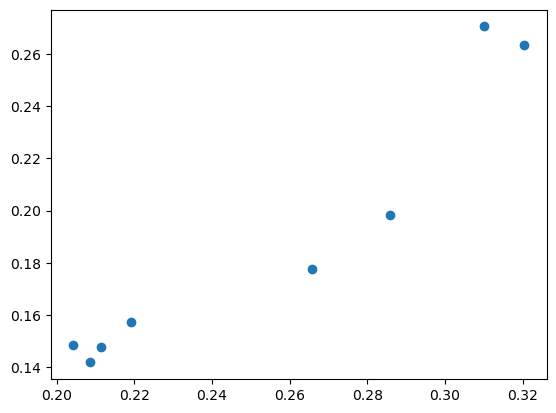

In [133]:
import matplotlib.pyplot as plt
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
plt.show()

In [134]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000


In [135]:
for portfolio in range(num_portfolios):
 weights = np.random.random(num_assets)
 weights = weights/np.sum(weights)
 p_weights.append(weights)
 returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
 # weights 
 p_ret.append(returns)
 var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
 sd = np.sqrt(var) #Daily standard deviation
 ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
 p_vol.append(ann_sd)

In [136]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 #print(counter, symbol)
 data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,CCOYX weight,IYGIX weight,JENIX weight,SCIRX weight,SWPPX weight,VDIGX weight,VHIAX weight,VIIIX weight
0,0.193609,0.230940,0.051875,0.134945,0.103803,0.230522,0.044880,0.141513,0.167283,0.125180
1,0.190831,0.230298,0.124052,0.085456,0.186554,0.117126,0.113206,0.025008,0.213177,0.135421
2,0.193588,0.229396,0.116527,0.162498,0.150028,0.192626,0.029780,0.113394,0.076185,0.158964
3,0.198184,0.230537,0.213751,0.072900,0.126000,0.144092,0.009424,0.225888,0.092076,0.115868
4,0.208985,0.243148,0.250897,0.093983,0.121640,0.211207,0.129920,0.082559,0.046933,0.062860


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

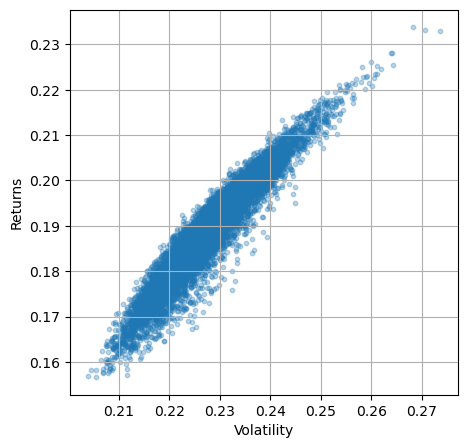

In [137]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [138]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified. 
min_vol_port

Returns         0.156937
Volatility      0.203863
CCOYX weight    0.018037
IYGIX weight    0.000520
JENIX weight    0.292594
SCIRX weight    0.037351
SWPPX weight    0.143817
VDIGX weight    0.383405
VHIAX weight    0.005317
VIIIX weight    0.118959
Name: 2466, dtype: float64

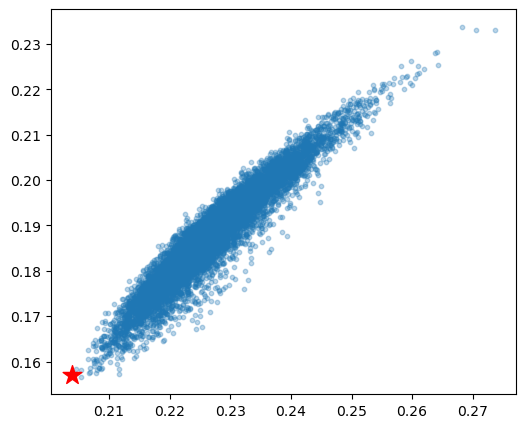

In [142]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [140]:
# Finding the optimal portfolio
rf = 0.005 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.213342
Volatility      0.242330
CCOYX weight    0.422518
IYGIX weight    0.114177
JENIX weight    0.140872
SCIRX weight    0.030439
SWPPX weight    0.017297
VDIGX weight    0.132660
VHIAX weight    0.109217
VIIIX weight    0.032820
Name: 9822, dtype: float64

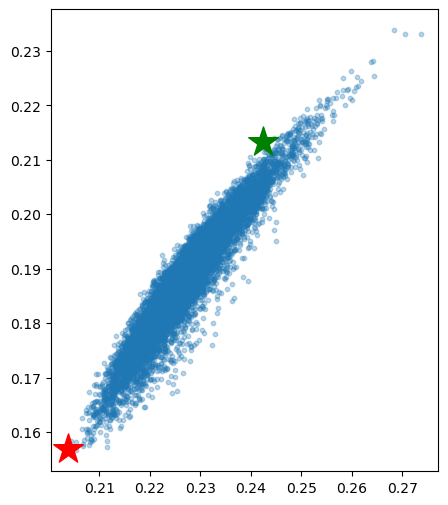

In [143]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)